In [33]:
import jax.numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [34]:
data = pd.read_csv('measurements.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   locationId  192 non-null    int64  
 1   location    192 non-null    object 
 2   city        192 non-null    object 
 3   country     192 non-null    object 
 4   utc         192 non-null    object 
 5   local       192 non-null    object 
 6   parameter   192 non-null    object 
 7   value       192 non-null    int64  
 8   unit        192 non-null    object 
 9   latitude    192 non-null    float64
 10  longitude   192 non-null    float64
dtypes: float64(2), int64(2), object(7)
memory usage: 16.6+ KB


In [35]:
# We only need the features time and value
features = ['utc', 'value']
data = data[features]
data

,utc,value
0,2023-03-01T23:30:00+00:00,130
1,2023-03-01T22:30:00+00:00,140
2,2023-03-01T21:30:00+00:00,140
3,2023-03-01T20:30:00+00:00,143
4,2023-03-01T19:30:00+00:00,116
...,...,...
187,2023-02-22T04:30:00+00:00,144
188,2023-02-22T03:30:00+00:00,143
189,2023-02-22T02:30:00+00:00,168
190,2023-02-22T01:30:00+00:00,171


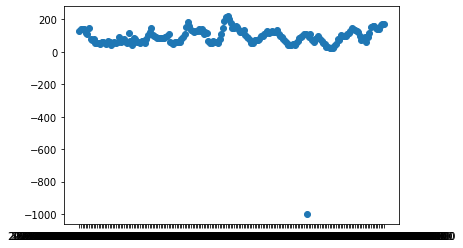

In [36]:
plt.scatter(y = data['value'], x = data['utc'])

In [37]:
# We can see that there is an outlier
x = data['value'].min()
data = data[data['value']>0] #pm2.5 value can't be < 0
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 191
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   utc     191 non-null    object
 1   value   191 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.5+ KB


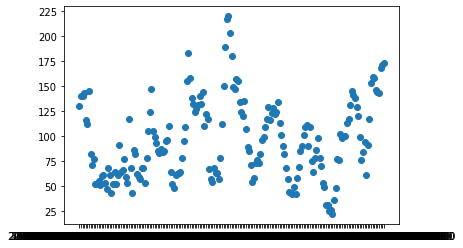

In [38]:
plt.scatter(y = data['value'], x = data['utc'])

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 

le_data = data
for i in data.columns:
    if data[i].dtype == 'object':
        le_data[i] = le.fit_transform(data[i])
    else:
        le_data[i] = data[i]

le_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 191
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   utc     191 non-null    int64
 1   value   191 non-null    int64
dtypes: int64(2)
memory usage: 4.5 KB


<ipython-input-39-0510da87b8aa>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  le_data[i] = le.fit_transform(data[i])
<ipython-input-39-0510da87b8aa>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  le_data[i] = data[i]


In [40]:
X = le_data.iloc[:,:-1].values
y = le_data['value'].values
X.shape, y.shape

((191, 1), (191,))

# (i) Using RandomForestRegressor

In [41]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X, y)

RandomForestRegressor()

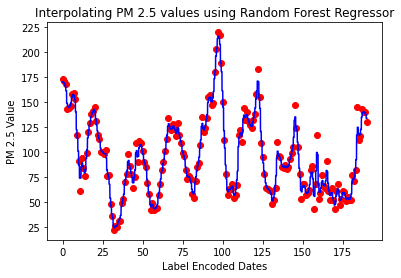

In [42]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, rf.predict(X_grid), color = 'blue')
plt.title('Interpolating PM 2.5 values using Random Forest Regressor')
plt.xlabel('Label Encoded Dates')
plt.ylabel('PM 2.5 Value')
plt.show()

# (ii) Using LinearRegression

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

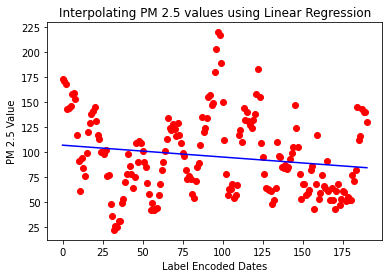

In [44]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lr.predict(X_grid), color = 'blue')
plt.title('Interpolating PM 2.5 values using Linear Regression')
plt.xlabel('Label Encoded Dates')
plt.ylabel('PM 2.5 Value')
plt.show()

# (iii) Gaussean Progress Regressor

In [45]:
from sklearn.gaussian_process import GaussianProcessRegressor
gpr = GaussianProcessRegressor()
gpr.fit(X,y)

GaussianProcessRegressor()

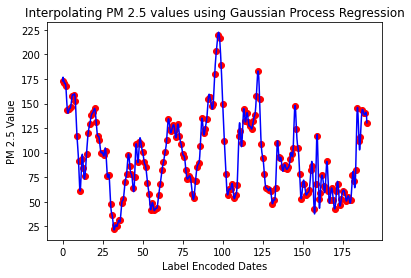

In [46]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, gpr.predict(X_grid), color = 'blue')
plt.title('Interpolating PM 2.5 values using Gaussian Process Regression')
plt.xlabel('Label Encoded Dates')
plt.ylabel('PM 2.5 Value')
plt.show()

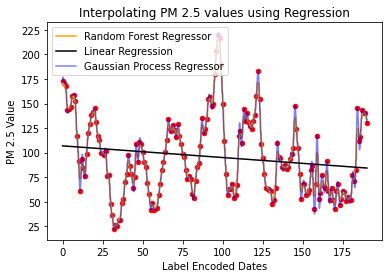

In [47]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red', s=20)
plt.plot(X_grid, rf.predict(X_grid), color = 'orange', label = 'Random Forest Regressor')
plt.plot(X_grid, lr.predict(X_grid), color = 'black', label = 'Linear Regression')
plt.plot(X_grid, gpr.predict(X_grid), color = 'blue', alpha=0.5, label = 'Gaussian Process Regressor')
plt.title('Interpolating PM 2.5 values using Regression')
plt.xlabel('Label Encoded Dates')
plt.ylabel('PM 2.5 Value')
plt.legend()
plt.show()

# Results Comparison

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
X_shuffle, y_shuffle = shuffle(X, y, random_state=42)

errors = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'neg_root_mean_squared_error']

for i in errors:
  print(i)
  temp = cross_val_score(lr, X_shuffle, y_shuffle, scoring = i, cv=5, n_jobs=1)
  error = -temp.mean()
  print("Linear Regression: ", np.round(error,2))

  temp = cross_val_score(rf, X_shuffle, y_shuffle, scoring = i, cv=5, n_jobs=1)
  error = -temp.mean()
  print("Random Forest Regression: ", np.round(error,2))

  temp = cross_val_score(gpr, X_shuffle, y_shuffle, scoring = i, cv=5, n_jobs=1)
  error = -temp.mean()
  print("Gaussian Process Regressor: ", np.round(error,2))
  print()

neg_mean_squared_error
Linear Regression:  1542.1699
Random Forest Regression:  248.93
Gaussian Process Regressor:  1269.0

neg_mean_absolute_error
Linear Regression:  32.16
Random Forest Regression:  11.349999
Gaussian Process Regressor:  24.789999

neg_root_mean_squared_error
Linear Regression:  39.149998
Random Forest Regression:  15.53
Gaussian Process Regressor:  34.73



The results can be summarised in the following table:

|                             | **Linear Regression** | **Random Forest Regression** | **Gaussian Process Regressor** |
|:---------------------------:|:---------------------:|:----------------------------:|:------------------------------:|
|    **Mean Squared Error**   |        1542.17        |            241.79            |             1269.0             |
|   **Mean Absolute Error**  |         32.16         |             11.4             |              24.79             |
| **Root Mean Squared Error** |         39.15         |             15.55            |              34.73             |

# Resources Used

<a href='https://medium.com/@sametgirgin/random-forest-regression-in-5-steps-with-python-ee4259eca0de'> Random Forest Regression </a>

<a href='https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html'> Gaussian Process Regressor </a>

<a href = 'https://towardsdatascience.com/k-fold-cross-validation-explained-in-plain-english-659e33c0bc0'> Cross-Validation </a>